# $\S$ 2.5. Local Methods in High Dimensions

> By relying on rigid assumptions, the linear model has no bias at all and negligible variance, while the error in 1-nearest neighbor is substantially larger. However, if the assumptions are wrong, all bets are off and the 1-nearest neighbor may dominate. We will see that there is a whole spectrum of models between the rigid linear models and the extremely flexible 1-nearest-neighbor models, each with their own assumptions and biases, which have been proposed specifically to avoid the exponential growth in complexity of functions in high dimensions by drawing heavily on these assumptions.

### The curse of dimensionality (Bellman, 1961)
### The first example: Unit hypercube

Consider the nearest-neighbor procedure for inputs uniformly distributed in a p-dimensional unit hypercube. Suppose we send out a hypercubical neighborhood about a target point to capture a fraction $r$ of the observations. Since this corresponds to a fraction $r$ of the unit volume, the expected edge length will be $e_p(r) = r^{1/p}$.

Note that $e_{10}(.01) = 0.63$ and $e_{10}(.1) = .80$, and such neighborhoods are no longer "local". Reducing $r$ dramatically does not help much either, since the fewer observations we average, the hight is the variance of our fit.

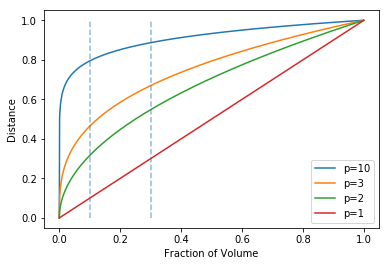

In [1]:
"""The unit hypercube example for the curse of dimensionality

This Python snippet aims to reproduce FIGURE 2.6., the right one.
"""
import numpy as np
import matplotlib.pyplot as plt


fraction_of_volume = np.arange(0, 1, 0.001)
edge_length_p1 = fraction_of_volume
edge_length_p2 = fraction_of_volume**.5
edge_length_p3 = fraction_of_volume**(1/3)
edge_length_p10 = fraction_of_volume**.1

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(fraction_of_volume, edge_length_p10, label='p=10')
ax.plot(fraction_of_volume, edge_length_p3, label='p=3')
ax.plot(fraction_of_volume, edge_length_p2, label='p=2')
ax.plot(fraction_of_volume, edge_length_p1, label='p=1')
ax.set_xlabel('Fraction of Volume')
ax.set_ylabel('Distance')
ax.legend()
ax.plot([.1, .1], [0, 1], '--', color='C0', alpha=.5)
ax.plot([.3, .3], [0, 1], '--', color='C0', alpha=.5)
plt.show()

### The second example: Unit ball

Consider $N$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin 0. And consider a nearest-neighbor estimate at 0. The median distance from 0 to the closest data point is given by the expression

\begin{equation}
d(p,N) = \left(1-\frac{1}{2}^{1/N}\right)^{1/p}
\end{equation}

Therefore with $N=500, p=10$, $d(p,N)\approx0.52$, more than half way to the boundary, implying that most data points are close to the boundary of the sample space than to any other data point.

Why is this a problem? it makes prediction much more difficult near the edges of the training sample. One must extrapolate from neighboring sample points rather than interpolate between them.

### The third example: Sampling density

If $N_1=100$ represents a dense sample for a single input problem, then $N_{10}=100^{10}$ is the sample size required for the same sampling density with 10 inputs. Thus in high dimensions all feasible training samples sparsely populate the input space.

### The fourth example: Bias-variance decomposition

Denote our training set by $\mathcal{T}$ and the sample $x_i$ is generated uniformly on $[-1,1]^p$ for $i=1,\cdots,1000$. Further assume that the true relationship between $X$ and $Y$ is

\begin{equation}
Y = f(X) = e^{-8\|X\|^2},
\end{equation}
without any measurement error.

Let's examine the 1-nearest-neighbor rule to predict $y_0$ at the test-point $x_0=0$. Since the problem is deterministic, this is the mean squared error (MSE) for estimating $f(0)$.

\begin{align}
\text{MSE}(x_0) &= \text{E}_\mathcal{T}\left[f(x_0)-\hat{y}_0\right]^2 \\
&= \text{E}_\mathcal{T}\left[f(x_0) -\text{E}_\mathcal{T}(\hat{y}_0) + \text{E}_\mathcal{T}(\hat{y}_0)-\hat{y}_0\right]^2 \\
&= \text{E}_\mathcal{T}\left[\hat{y}_0 - \text{E}_\mathcal{T}(\hat{y}_0)\right]^2 + \left[\text{E}_\mathcal{T}(\hat{y}_0)-f(x_0)\right]^2 + 2\left[\text{E}_\mathcal{T}(\hat{y}_0)-f(x_0)\right]\text{E}_\mathcal{T}\left[\hat{y}_0 - \text{E}_\mathcal{T}(\hat{y}_0)\right]\\
&= \text{E}_\mathcal{T}\left[\hat{y}_0 - \text{E}_\mathcal{T}(\hat{y}_0)\right]^2 + \left[\text{E}_\mathcal{T}(\hat{y}_0)-f(x_0)\right]^2 \\
&= \text{Var}_\mathcal{T}(\hat{y}_0) + \text{Bias}^2(\hat{y}_0)
\end{align}

Such a decomposition is always possible and often useful, and is known as the *bias-variance decomposition*.

In [2]:
"""Bias-variance decomposition example

This snippet would like to reproduce FIGURE 2.7, the bottom ones.

Given the dimension p, 100 simulations are done and the following steps are
taken for each simulation.
1. Generate data of size 1000 from [-1, 1]^p
2. Grap the nearest neighbor x of 0 and calculate the distance, i.e., norm
3. Calculate y=f(x) and the variance and the squared bias for simulation
of size 100.
"""
import math
import random


def generate_data(p: int, n: int) ->np.ndarray:
    if p is 1:
        return np.array([random.uniform(-1, 1) for _ in range(n)])
    return np.array([
        [random.uniform(-1, 1) for _ in range(p)]
        for _ in range(n)
    ])


def f(p: int, x: np.ndarray) ->float:
    if p is 1:
        return math.exp(-8*(x**2))
    return math.exp(-8*sum(xi*xi for xi in x))


def simulate(p: int, nsample:int, nsim: int) ->dict:
    res = {'average_distance': 0}
    sum_y = 0
    sum_y_square = 0
    for _ in range(nsim):
        data = generate_data(p, nsample)
        if p is 1:
            data_norm = np.abs(data)
        else:
            data_norm = np.linalg.norm(data, ord=2, axis=1)
        nearest_index = data_norm.argmin()
        nearest_x, nearest_distance = data[nearest_index], data_norm[nearest_index]
        nearest_y = f(p, nearest_x)
        sum_y += nearest_y
        sum_y_square += nearest_y*nearest_y
        res['average_distance'] += nearest_distance
    average_y = sum_y/nsim
    res['average_distance'] /= nsim
    res['variance'] = sum_y_square/nsim - average_y*average_y
    res['squared_bias'] = (1-average_y)*(1-average_y)
    return res

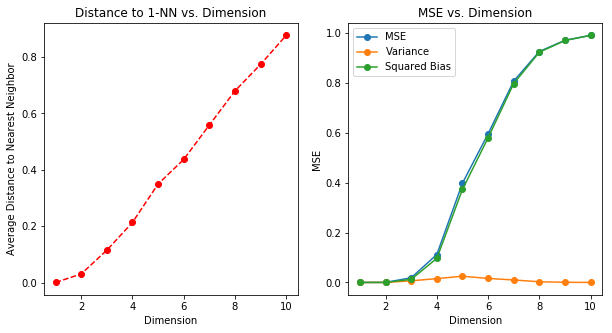

In [3]:
nsim = 100
data = {p: simulate(p, 1000, nsim) for p in range(1, 11)}
dimension = list(data.keys())
average_distance = [d['average_distance'] for p, d in data.items()]
variance = np.array([d['variance'] for p, d in data.items()])
squared_bias = np.array([d['squared_bias'] for p, d in data.items()])
mse = variance + squared_bias

fig27 = plt.figure(figsize=(10, 5))
ax1 = fig27.add_subplot(1, 2, 1)
ax1.set_title('Distance to 1-NN vs. Dimension')
ax1.plot(dimension, average_distance, 'ro--')
ax1.set_xlabel('Dimension')
ax1.set_ylabel('Average Distance to Nearest Neighbor')

ax2 = fig27.add_subplot(1, 2, 2)
ax2.set_title('MSE vs. Dimension')
ax2.plot(dimension, mse, 'o-', label='MSE')
ax2.plot(dimension, variance, 'o-', label='Variance')
ax2.plot(dimension, squared_bias, 'o-', label='Squared Bias')
ax2.set_xlabel('Dimension')
ax2.set_ylabel('MSE')
ax2.legend()
plt.show()

In low dimensions and with $N = 1000$, the nearest neighbor is very close to $0$, and so both the bias and variance are small. As the dimension increases, the nearest neighbor tends to stray further from the target point, and both bias and variance are incurred. By $p = 10$, for more than $99\%$ of the samples the nearest neighbor is a distance greater than $0.5$ from the origin.

### What about the linear model?

> By imposing some heavy restrictions on the class of models being fitted, we can avoid the curse of dimensionality.

Suppose the relationship between $Y$ and $X$ is linear,
\begin{equation}
Y=X^T\beta+\epsilon,
\end{equation}
where $\epsilon\sim N(0,\sigma^2)$. Fitting the model by least squares, and since the least squares estimates are unbiased, we find that for an arbitrary test point $x_0$ and its estimate $\hat{y}_0=x_0^T\hat{\beta}$,

\begin{align}
\text{EPE}(x_0) &= \text{E}_{y_0|x_0}\text{E}_\mathcal{T}\left(y_0-\hat{y}_0\right)^2 \\
&= \text{Var}(y_0|x_0) + \text{E}_\mathcal{T} \left(\hat{y}_0 - \text{E}_\mathcal{T}\hat{y}_0\right)^2 + \left(\text{E}_\mathcal{T}\hat{y}_0 - x_0^T\beta\right)^2 \\
&= \text{Var}(y_0|x_0) + \text{Var}_\mathcal{T}(\hat{y}_0) + \text{Bias}^2(\hat{y}_0) \\
&= \sigma^2 + \text{E}_\mathcal{T}x_0^T\left(\mathbf{X}^T\mathbf{X}\right)^{-1}x_0\sigma^2 + 0^2.
\end{align}

Note that
1. An additional variance $\sigma^2$ is incurred, since our target is not deterministic.
2. There is no bias, and the variance depends on $x_0$.

If $N$ is large, $\mathcal{T}$ were selected at random, and $\text{E}(X)=0$, then $\mathbf{X}^T\mathbf{X}\rightarrow N\text{Cov}(X)$ and

\begin{align}
\text{E}_{x_0}\text{EPE}(x_0) &\sim \text{E}_{x_0}x_0^T\text{Cov}(X)^{-1}x_0\sigma^2/N + \sigma^2 \\
&= \text{trace}\left(\text{Cov}(X)^{-1}\text{Cov}(x_0)\right)\sigma^2/N + \sigma^2 \\
&= \sigma^2(p/N+1).
\end{align}

The expected EPE increases linearly as a function of $p$, with slope $\sigma^2/N$. If $N$ is large and/or $\sigma^2$ is small, this growth is variance is negligible.